# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [446]:
### импортируйте нужные библиотеки 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats
from datetime import datetime, timedelta

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [447]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.sample(7).T

,1262,1089,597,1366,833,964,1979
ID,6049,7348,7444,2698,11003,5633,10913
Year_Birth,1982,1958,1969,1976,1980,1980,1984
Education,Master,PhD,Master,Graduation,2n Cycle,Graduation,Master
Marital_Status,Together,Single,Married,Single,Together,Married,Single
Income,73450.0,71691.0,42169.0,47025.0,25130.0,50183.0,31385.0
Kidhome,0,0,1,0,1,1,1
Teenhome,0,0,1,1,0,1,0
Dt_Customer,05-12-2013,17-03-2014,19-10-2013,07-11-2013,02-10-2013,25-06-2014,05-12-2012
Recency,85,0,20,52,10,47,56
MntWines,1142,336,19,254,2,97,3


In [448]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [449]:
# ваш код здесь
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Вывод:**

- Всего в базе данных 2240 записей.
- В среднем год рождения покупателей 1968. Но минимальное значение составляет 1893, что является выбросом. Максимальный год рождения - 1996, что скорее всего означает, что все покупатели совершенннолетние.
- в столбце Income присутствуют пропуски, которые предстоит обработать. Также предстоит обработать столбец на предмет выбросов, т.к. среднее значение здесь составляет 52247 с минимальным значением 1730 и максимальным значением 666666.
- Количество детей и подростков у покупателей варьируется от 0 до 2.
- Последняя покупка в среднем была совершена 49 дней назад с отклонением в 29 дней.
- Средние суммы, потраченные на разные категории продуктов немного превышают медианные значения. Следовательно, возможны незначительные выбросы.
- Среднее количество покупок, совершенных со скидкой, 2.325.
- Средние количества покупок, совершенных через веб-сайт, каталог и магазин, 4.08, 2.66 и 5.79 соответственно.
- Среднее количество визитов в месяц 5.3.
- В среднем предложения в кампаниях принимают 1-7% покупателей и 14.9% в последней кампании.
- В среднем меньше 1% покупателей жаловались в течение последних 2 лет.
- К сожалению, неизвестно, что означают столбцы Z_CostContact и Z_Revenue, которые имеют одинаковые значения для всех покупателей. Поэтому дальше я их удаляю:

In [450]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [451]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [452]:
display(df.Education.value_counts())
display(df.Marital_Status.value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [453]:
# Перевожу столбец 'Dt_Customer' из object в datetime:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [454]:
df.groupby(df['Dt_Customer'].dt.year).size()

Dt_Customer
2012     494
2013    1189
2014     557
dtype: int64

**Вывод:**
- Столбец Education имеет 5 уникальных значений. Наиболее пополярным является Graduation.
- Столбец Marital_Status имеет 8 уникальных значений, наиболее часто встречающимся из которых является Married.
- Dt_Customer имеет 663 уникальных значения. В 2013 году зарегистрировалось наибольшее количество покупателей.

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [455]:
# ваш код здесь
df.duplicated().sum()

np.int64(0)

**Вывод**: дубликатов нет.

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [456]:
# ваш код здесь
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [457]:
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


Заменим пустые значения на средние. Для этого сначала разберемся с выбросами.

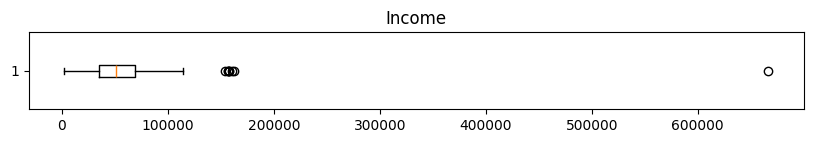

In [458]:
plt.figure(figsize=(10,1))
plt.title('Income')
plt.boxplot(df['Income'].loc[~df.isna().any(axis=1)], vert=False)
plt.show()

Рассмотрим подробно запись о покупателе с выбивающимся значением в столбце Income:

In [459]:
df.loc[df['Income'] == df['Income'].max()].T

,2233
ID,9432
Year_Birth,1977
Education,Graduation
Marital_Status,Together
Income,666666.0
Kidhome,1
Teenhome,0
Dt_Customer,2013-06-02 00:00:00
Recency,23
MntWines,9


Т.к. суммы потраченные на различные виды продуктов, меньше средних при наличии 1 ребенка, что не соответствует годовому доходу, принимаю решение удалить запись.

In [460]:
df.drop(df[df['Income'] == df['Income'].max()].index, inplace=True)
df['Income'].max()

np.float64(162397.0)

Заменяю пропуски на новое среднее значение в столбце:

In [461]:
display(df.Income.mean())
df.fillna({'Income': df['Income'].mean()}, inplace=True)

np.float64(51969.861399548536)

In [462]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

Теперь пропусков нет.

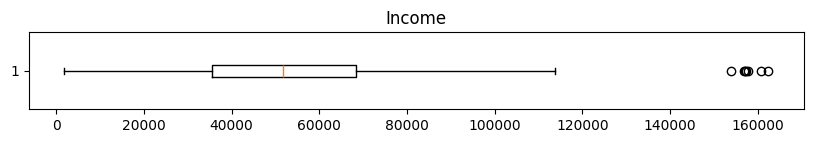

In [463]:
plt.figure(figsize=(10,1))
plt.title('Income')
plt.boxplot(df['Income'], vert=False)
plt.show()

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

Все данные имеют нужные типы. Но для корреляционного анализа добавила столбцы 'Education_rate' и 'Marital_Status_rate', содержащие закодированные данные из столбцов 'Education' и 'Marital_Status' соответственно.

In [464]:
# ваш код здесь
df['Marital_Status_rate'] = pd.factorize(df['Marital_Status'])[0]

# образование кодирую по возрастанию его уровня:
df['Education_rate'] = df['Education'].apply(lambda x: 0 if x == 'Basic' else\
                                                    (1 if x == 'Graduation' else\
                                                    (2 if x == '2n Cycle' else\
                                                    (3 if x == 'Master' else 4))))

Также добавлю следующие столбцы:
- 'Age', считая 2014 год годом создания датасета
- 'Children', суммирующий 'Kidhome' и 'Teenhome'
- 'NumPurchases', суммирующий все покупки
- 'Mnt', содержащий общую сумму всех покупок клиента

In [465]:
df['Age'] = 2014 - df['Year_Birth']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['NumPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Mnt'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df.sample(5).T

,1915,550,2091,1913,1152
ID,10176,4279,2686,5831,10710
Year_Birth,1968,1963,1969,1967,1979
Education,Graduation,2n Cycle,Basic,Graduation,Graduation
Marital_Status,Single,Single,Together,Married,Married
Income,57107.0,39548.0,22390.0,77870.0,7500.0
Kidhome,0,1,0,0,0
Teenhome,1,1,0,1,1
Dt_Customer,2012-08-24 00:00:00,2014-03-31 00:00:00,2013-10-21 00:00:00,2012-08-22 00:00:00,2012-08-29 00:00:00
Recency,44,87,49,93,61
MntWines,159,15,0,1017,5


**Вывод:**
Все данные имеют нужные типы.

## Визуализация

In [466]:
# ваш код здесь
num_cols = ['Age', 'Income', 'Recency', 'Mnt', 'MntWines', 'MntFruits', 'MntMeatProducts',\
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',\
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Children']

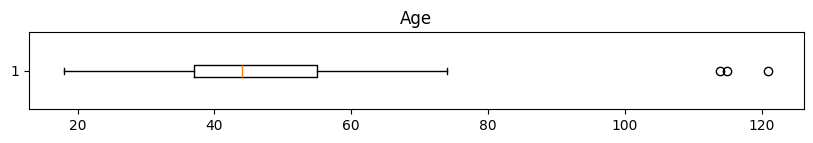

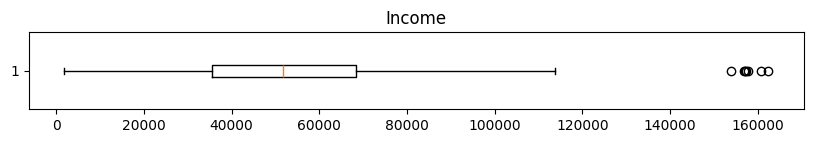

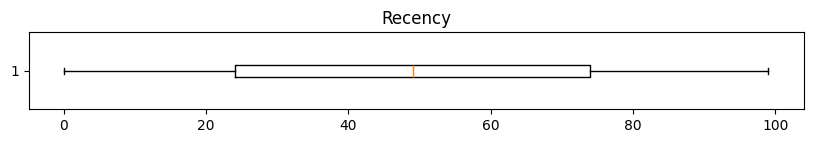

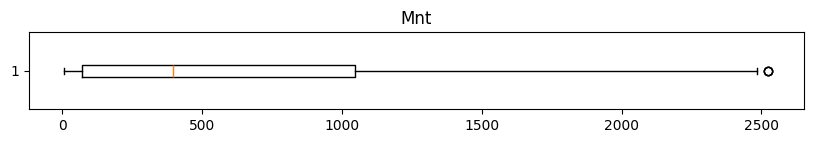

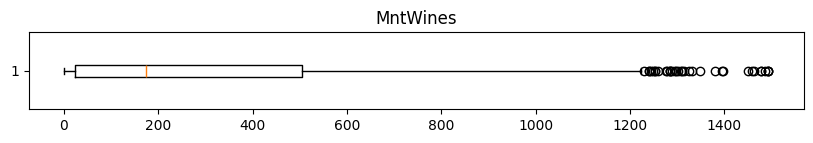

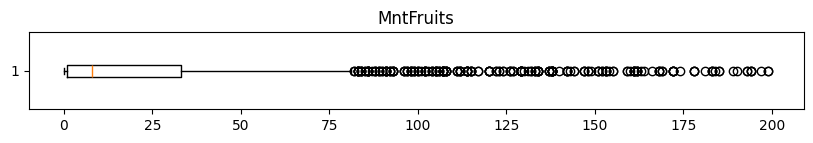

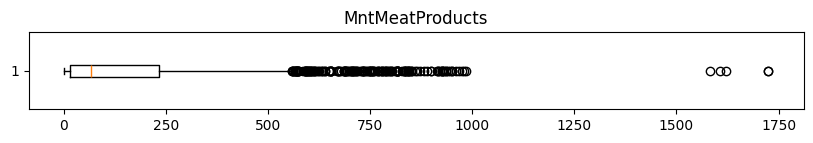

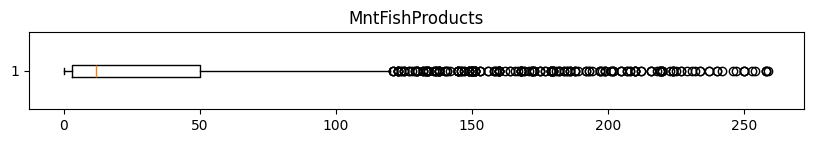

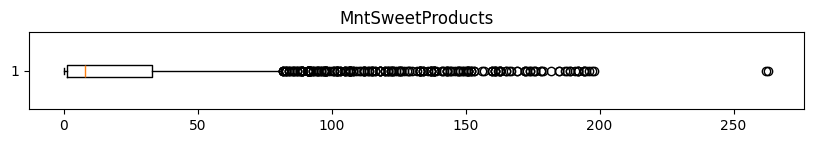

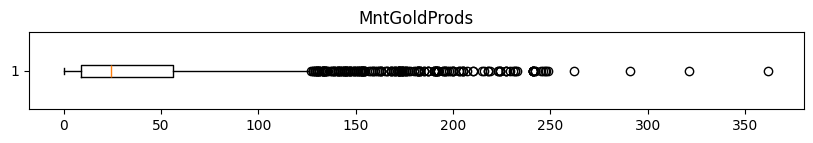

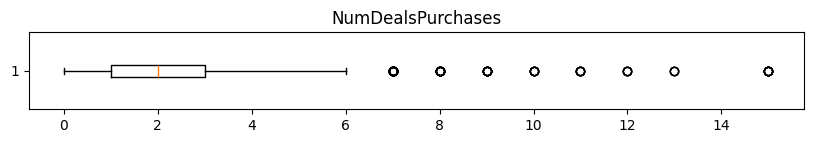

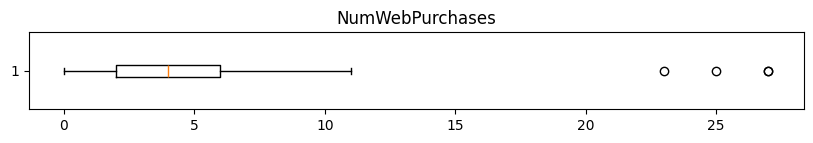

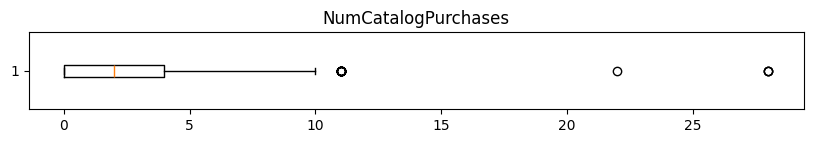

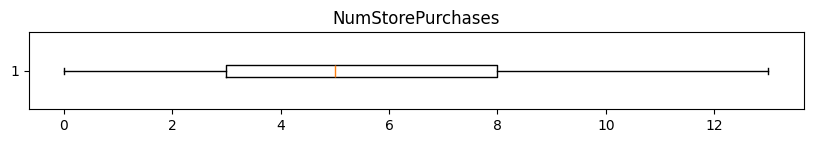

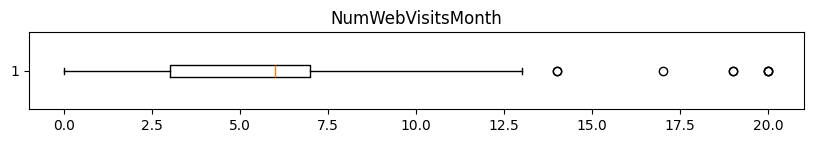

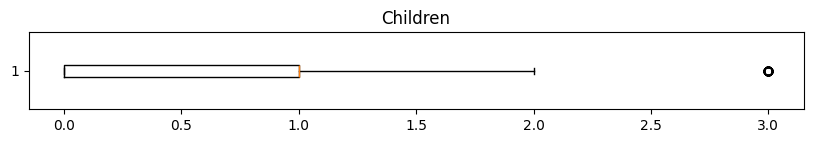

In [467]:
for col in num_cols:    
    plt.figure(figsize=(10,1))
    plt.title(col)
    plt.boxplot(df[col], vert=False)
    plt.show()

Удаляю строки с 3 выбросными значениями в столбце 'Age'. Экстремальные значения в других столбцах оставлю. 

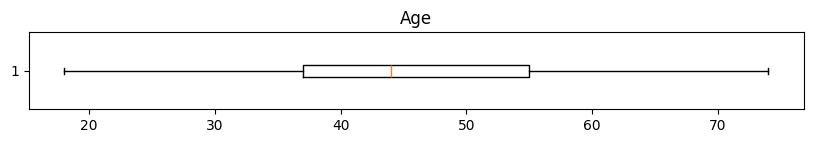

In [468]:
df.drop(df[df['Age'].isin(df['Age'].nlargest(3, keep='all'))].index, inplace=True)

plt.figure(figsize=(10,1))
plt.title('Age')
plt.boxplot(df['Age'], vert=False)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Mnt'}>],
       [<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>],
       [<Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>],
       [<Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>],
       [<Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'Children'}>]], dtype=object)

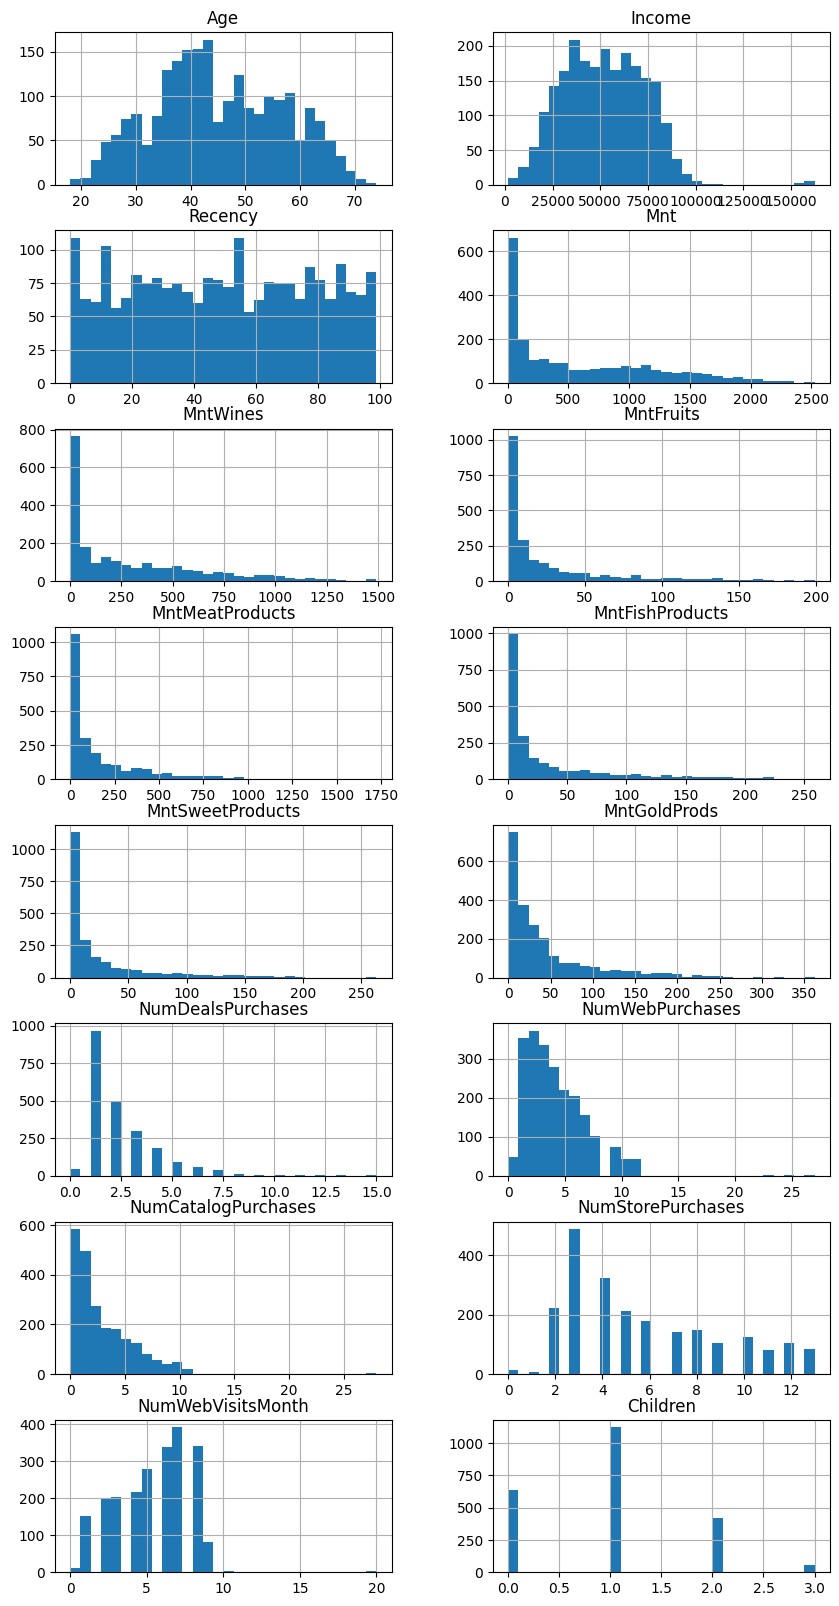

In [469]:
df[num_cols].hist(figsize=(10, 20), layout=(8, 2), bins=30)

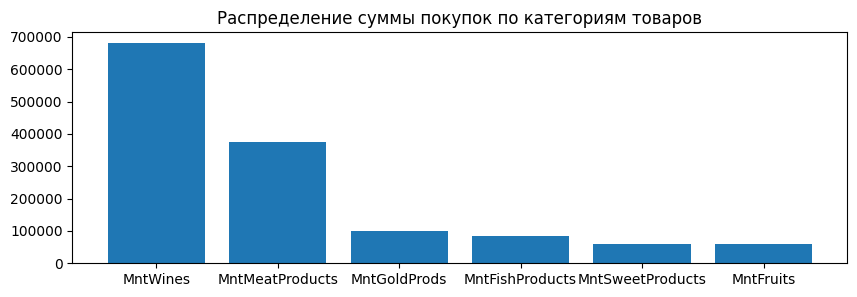

In [470]:
df_mnt = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
    .sum().sort_values(ascending=False)

plt.figure(figsize=(10, 3))
plt.bar(df_mnt.index, df_mnt.values, align='center')
plt.title('Распределение суммы покупок по категориям товаров')
plt.show()

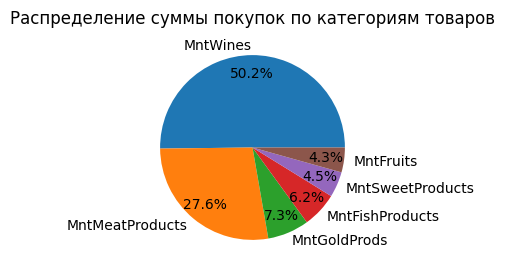

In [471]:
plt.figure(figsize=(3,3))
plt.title('Распределение суммы покупок по категориям товаров')
plt.pie(df_mnt, labels=df_mnt.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.show()

**Вывод:**

Как видно из графиков, покупатели тратят примерно половину денег на алкоголь (50.2%) и четверть на мясные продукты (27.6%). Еще четверть приходится на всё остальное. Меньше всего покупатели тратят на фрукты (4.3%).

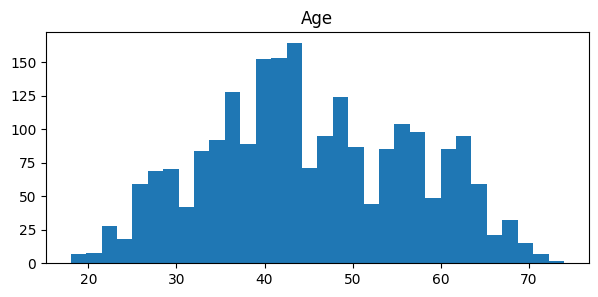

In [472]:
plt.figure(figsize=(7,3))
plt.title('Age')
plt.hist(df.Age, bins=32)
plt.show()

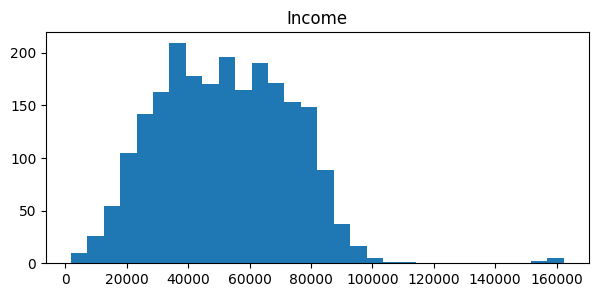

In [473]:
plt.figure(figsize=(7,3))
plt.title('Income')
plt.hist(df.Income, bins=30)
plt.show()

**Вывод:**

Как видно из графиков, возраст покупателей распределен неравномерно с пиками и падениями. Но можно сказать, что основные покупатели имеют возраст от 32 до 62 лет с годовым доходом от 25000 до 80000 денежных единиц.

Чтобы изучить потребительские предпочтения покупателей в зависимости от возраста, разобью данные на 8 равных возрастных групп:

In [474]:
df_age = df.groupby(pd.cut(df['Age'], bins=8), observed=False)\
    [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']].mean()
df_age

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt
Age,,,,,,,
"(17.944, 25.0]",291.824176,33.890110,241.945055,47.175824,30.604396,51.593407,697.032967
"(25.0, 32.0]",242.321569,27.541176,176.482353,36.752941,29.376471,41.674510,554.149020
"(32.0, 39.0]",240.907193,24.482599,141.556845,36.213457,25.526682,39.986079,508.672854
"(39.0, 46.0]",278.844488,22.850394,146.222441,31.673228,23.553150,39.027559,542.171260
"(46.0, 53.0]",346.785075,27.229851,161.513433,35.325373,26.644776,47.367164,644.865672
"(53.0, 60.0]",357.654286,28.151429,181.902857,43.122857,29.837143,46.751429,687.420000
"(60.0, 67.0]",374.039823,25.703540,190.853982,38.234513,27.424779,52.769912,709.026549
"(67.0, 74.0]",507.800000,42.550000,253.925000,75.000000,43.550000,45.175000,968.000000


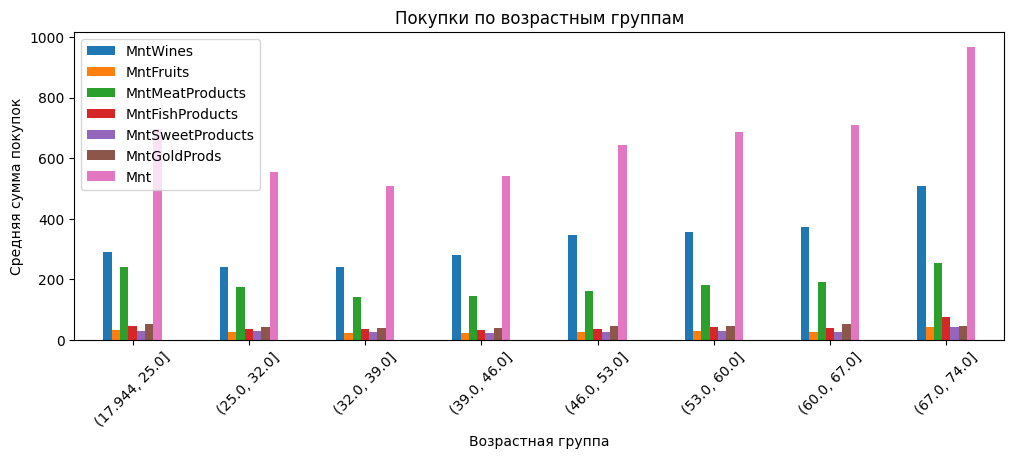

In [475]:
df_age.plot(kind='bar', figsize=(12, 4), rot=45)

plt.title('Покупки по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя сумма покупок')
plt.show()


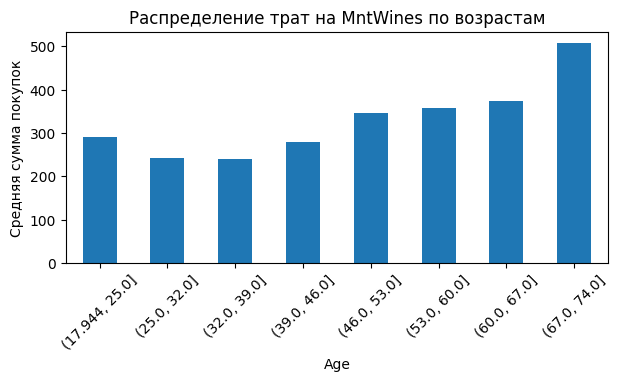

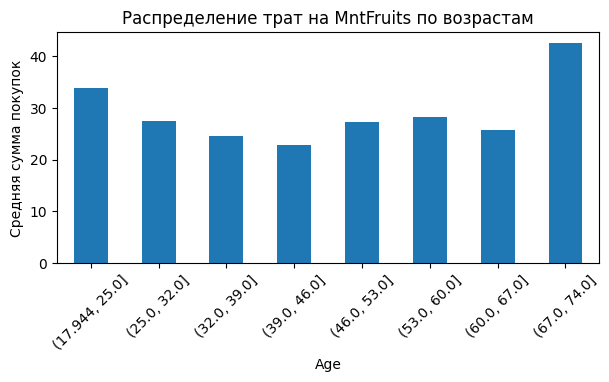

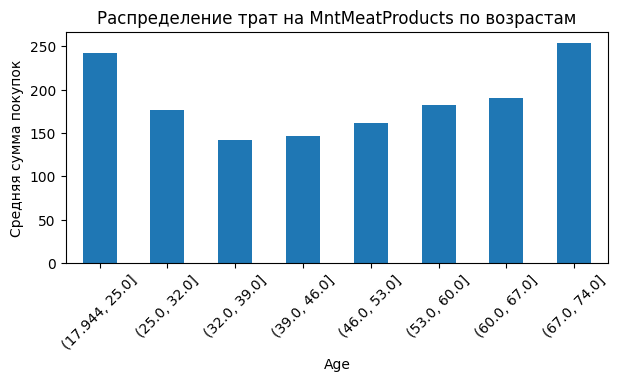

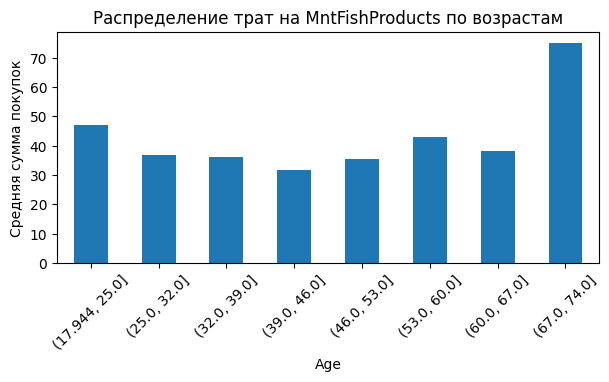

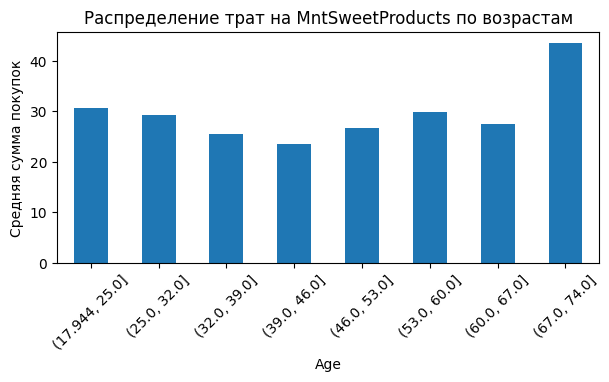

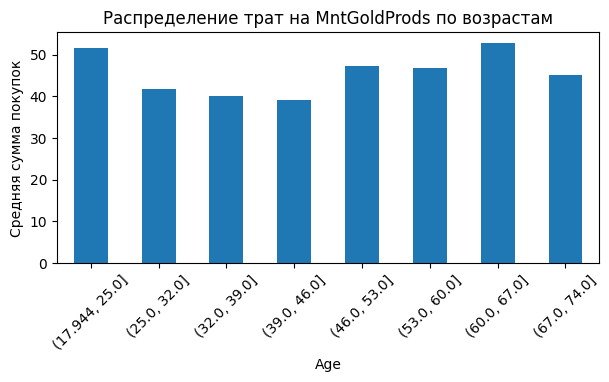

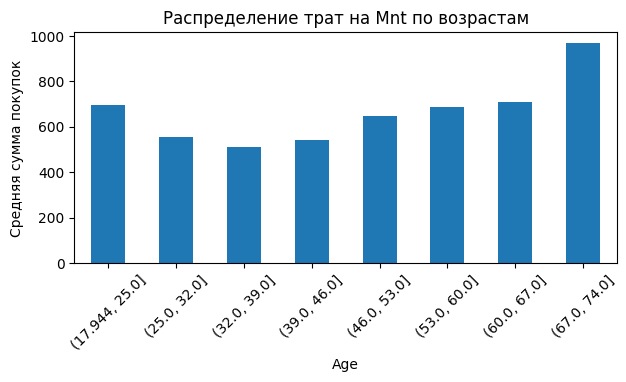

In [476]:
for col in df_age.columns:
    df_age[col].plot(kind='bar', figsize=(7, 3), rot=45)

    plt.title(f'Распределение трат на {col} по возрастам')
    plt.ylabel('Средняя сумма покупок')
    plt.show()

Из диаграмм видно, что в среднем большие суммы тратят покупатели до 25 и после 46 лет. Но лидирует возрастная группа 67-74 лет. Покупки по категориям примерно пропорциональны общей сумме трат на продукты. Причем можно видеть, что:
- на *вино* основные траты приходятся на возраст после 46 лет (максимально 67-74 лет)
- *фрукты* и *мясные продукты* больше покупают люди в возрасте 17-25 и 67-74 лет
- *рубу* и *сладости* предпочитают покупатели от 67 лет
- *золото* покупают больше в возрасте 17-25 и после 46 лет. 

Рассмотрим соотношение трат на каждый вид продукта в бюджете каждой возрастной группы:

In [477]:
df_cat_budjet = pd.DataFrame({col: (df_age[col] / df_age['Mnt'] * 100).round(1) for col in df_age.iloc[:,:-1]},\
                             index=df_age.index)
df_cat_budjet


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age,,,,,,
"(17.944, 25.0]",41.9,4.9,34.7,6.8,4.4,7.4
"(25.0, 32.0]",43.7,5.0,31.8,6.6,5.3,7.5
"(32.0, 39.0]",47.4,4.8,27.8,7.1,5.0,7.9
"(39.0, 46.0]",51.4,4.2,27.0,5.8,4.3,7.2
"(46.0, 53.0]",53.8,4.2,25.0,5.5,4.1,7.3
"(53.0, 60.0]",52.0,4.1,26.5,6.3,4.3,6.8
"(60.0, 67.0]",52.8,3.6,26.9,5.4,3.9,7.4
"(67.0, 74.0]",52.5,4.4,26.2,7.7,4.5,4.7


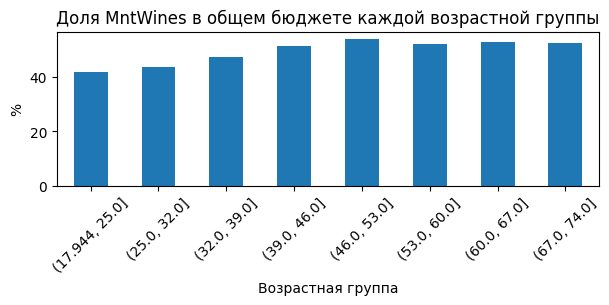

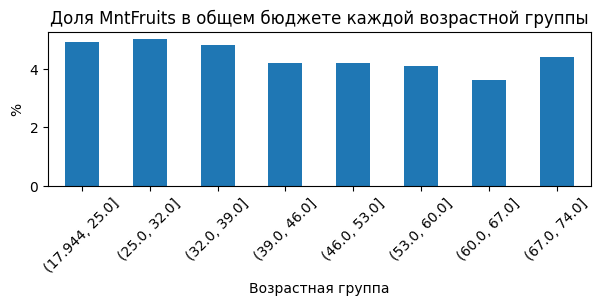

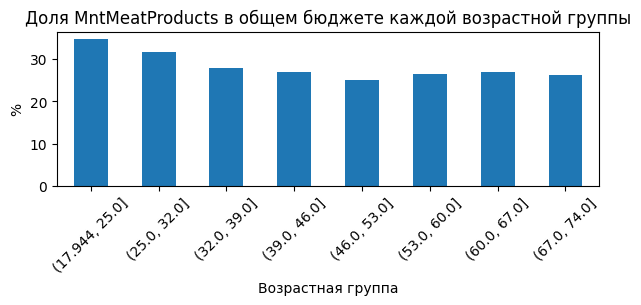

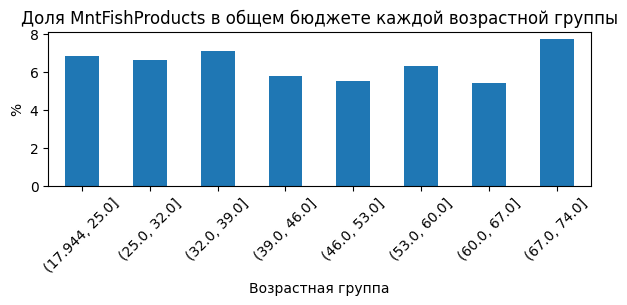

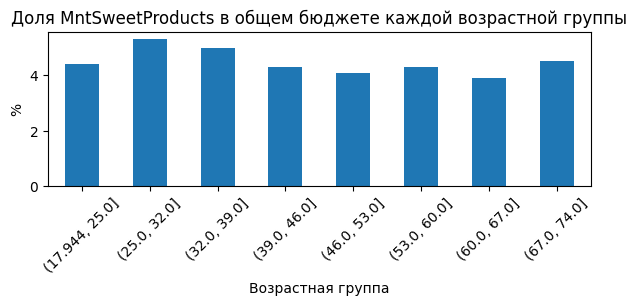

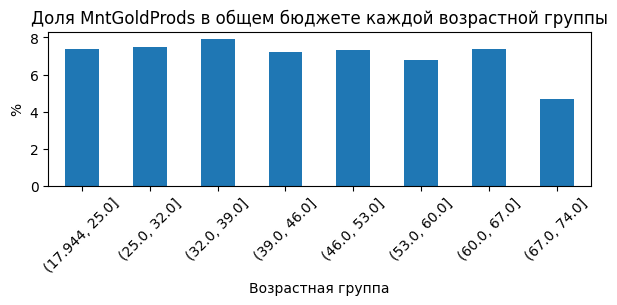

In [478]:
for col in df_cat_budjet.columns:
    df_cat_budjet[col].plot(kind='bar', figsize=(7, 2), rot=45)

    plt.title(f'Доля {col} в общем бюджете каждой возрастной группы')
    plt.xlabel('Возрастная группа')
    plt.ylabel('%')
    plt.show()

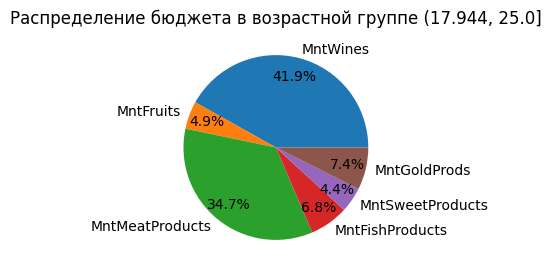

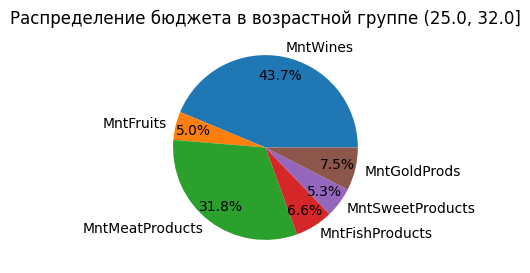

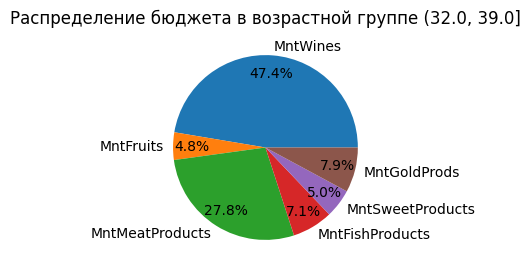

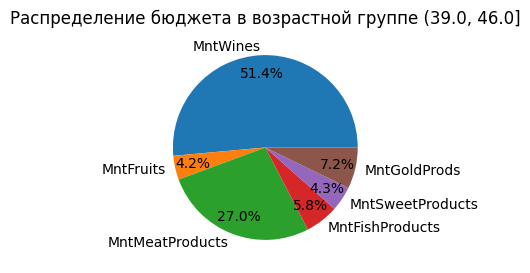

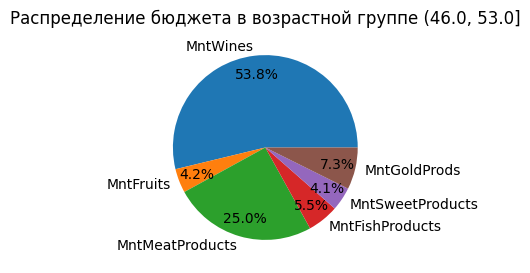

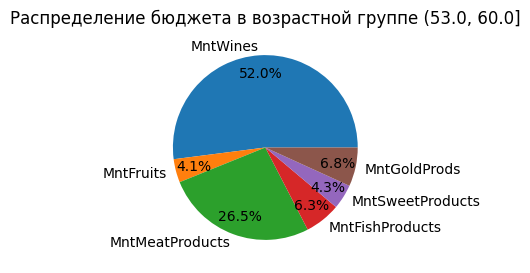

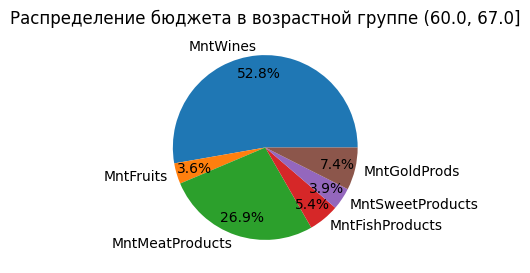

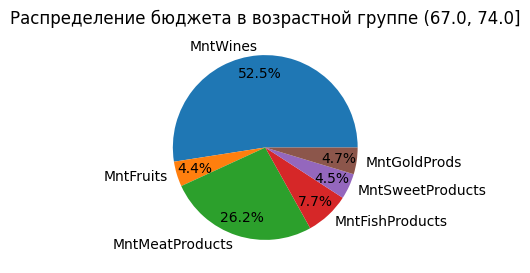

In [479]:
for i in range(len(df_age)):
    plt.figure(figsize=(3,3))
    plt.title(f'Распределение бюджета в возрастной группе {df_age.index[i]}')
    plt.pie(df_age.iloc[i, :-1], labels=df_age.iloc[i, :-1].index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
    plt.show()

Из диаграмм выше можем видеть, что:
- доля трат на вино в бюджете каждой возрастной группы увеличивается с возрастом c 41.9% до 53.8%
- максимальная доля трат на фрукты в бюджете людей младше 39 лет и с возрастом уменьшается с 5.0% до 3.6%
- на мясо больший процент трат закладывает группа людей младше 32 лет (от 31.8%)
- на рыбу тратятся больше покупатели младше 39 (6.6-7.1%) и старше 67 лет (7.7%)
- сладости занимают большую долю в бюджете людей 25-39 лет (5-5.3%)
- доля трат на золото в бюджете общих покупок составляет максимально у людей 32-39 лет (7.9%), минимально -  старше 67 лет (4.7%)

Проведем корреляцию:

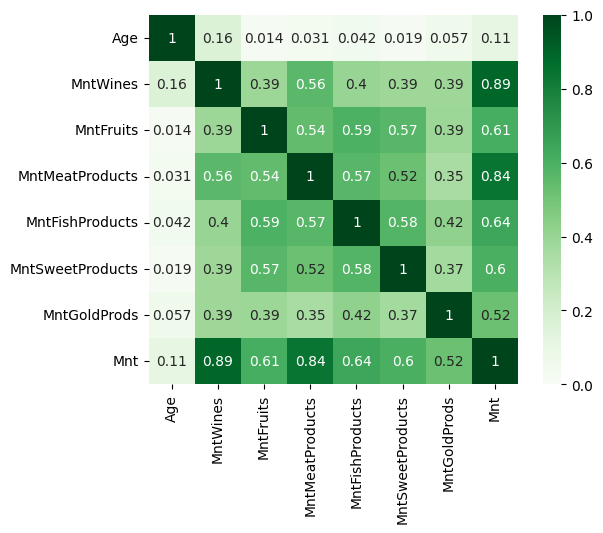

In [480]:
df_phik_age = df.loc[:, ['Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']]
corrs = df_phik_age.corr()
# plt.figure(figsize=(12, 10))
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Из проведенного анализа можно видеть, что есть слабая корреляция между возрастом покупателей и их тратами на вино (0.16) и общими тратами (0.11). Но большую зависимость можно видеть в сочетаемости продуктов. То есть люди, которые берут вино, с большей вероятностью возьмут мясо (0.56), а те, кто берет рыбу, скорее всего возьмет фрукты (0.59) и сладости (0.58). Таким образом, возраст не является решающим фактором, влияющим на траты покупателей.

In [481]:
df_children = df.groupby('Children')\
    [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']].mean()
df_children

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt
Children,,,,,,,
0,486.885400,52.213501,372.312402,76.503925,53.043956,63.897959,1104.857143
1,267.724444,19.386667,98.864000,26.692444,20.344889,40.848889,473.861333
2,141.591449,7.878860,51.299287,11.387173,8.370546,25.420428,245.947743
3,171.377358,6.905660,64.018868,7.075472,6.622642,18.603774,274.603774


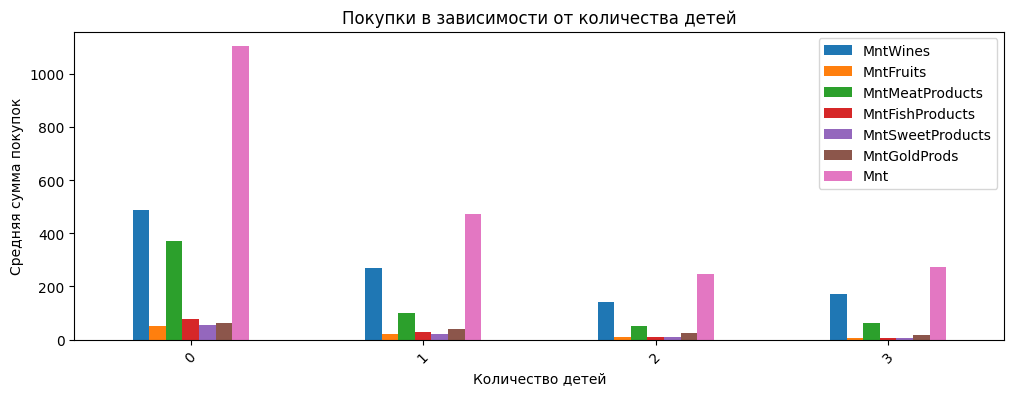

In [482]:
df_children.plot(kind='bar', figsize=(12, 4), rot=45)

plt.title('Покупки в зависимости от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Средняя сумма покупок')
plt.show()

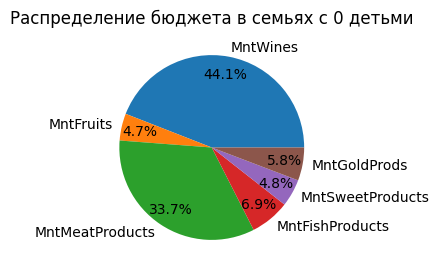

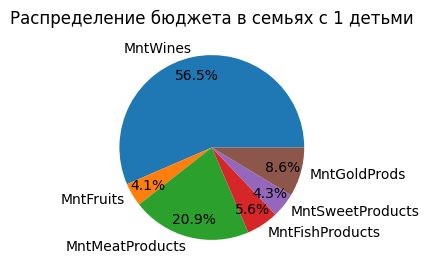

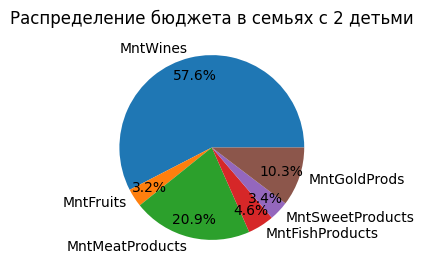

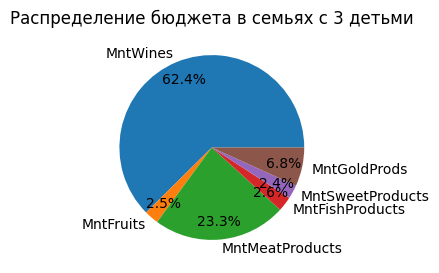

In [483]:
for index, row in df_children.iterrows():
    plt.figure(figsize=(3, 3))
    plt.pie(row[:-1], labels=row[:-1].index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
    plt.title(f'Распределение бюджета в семьях с {index} детьми')
    plt.show()

Исходя из графиков, можно увидеть, что в среднем покупатели без детей тратят больше денег на продукты. С увеличением детей тенденция снижается, что можно объяснить ужиманием бюджета семей в пользу других трат, связанных с детьми и например, ипотекой. Также доля алкоголя и золота в бюджете покупателей увеличивается с ростом количества детей.

Проведем корреляционный анализ:

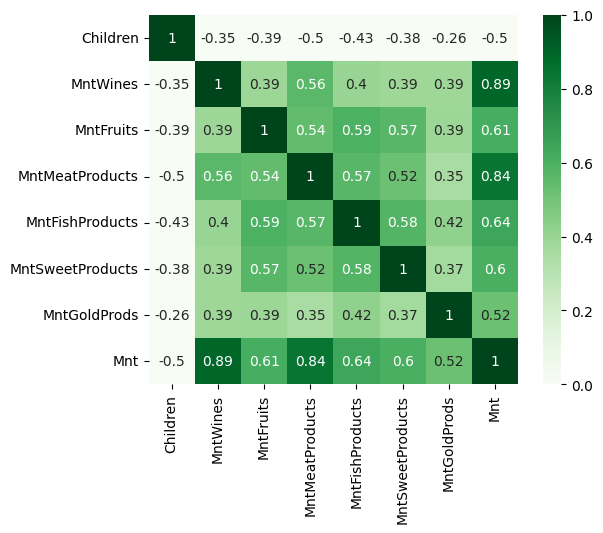

In [484]:
df_phik_age = df.loc[:, ['Children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']]
corrs = df_phik_age.corr()
# plt.figure(figsize=(12, 10))
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Из корреляционного анализа видно, что действительно с ростом количества детей происходит снижение трат на каждую из исследуемых групп продуктов, так и в сумме. Сильнее всего реагируют мясные продукты (-0.5) и рыбные (-0.43), меньше всего золото (-0.26).

In [485]:
df_education = df.groupby('Education')\
    [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']].mean()\
    .sort_values(['Mnt'], ascending=False)
df_education

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt
Education,,,,,,,
PhD,403.773196,19.793814,167.791753,26.569072,20.131959,31.915464,669.975258
Graduation,284.513321,30.789520,179.632327,43.181172,31.394316,50.883659,620.394316
Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297,611.781081
2n Cycle,200.039801,29.213930,142.597015,47.885572,34.572139,46.726368,501.034826
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,81.796296


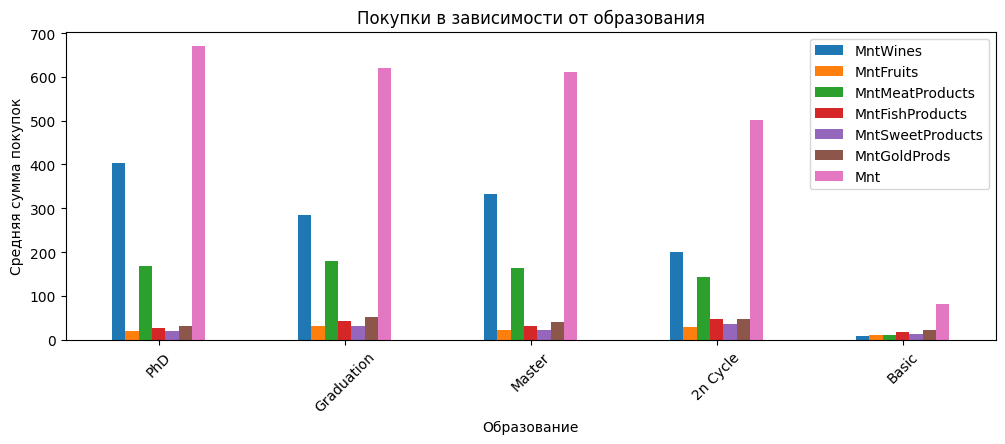

In [486]:
df_education.plot(kind='bar', figsize=(12, 4), rot=45)

plt.title('Покупки в зависимости от образования')
plt.xlabel('Образование')
plt.ylabel('Средняя сумма покупок')
plt.show()

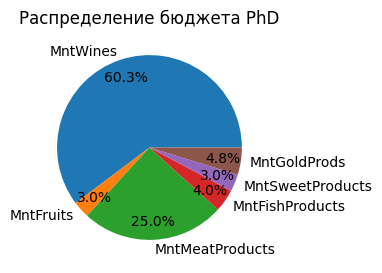

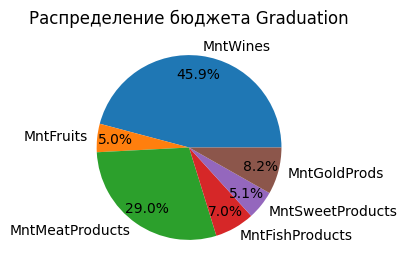

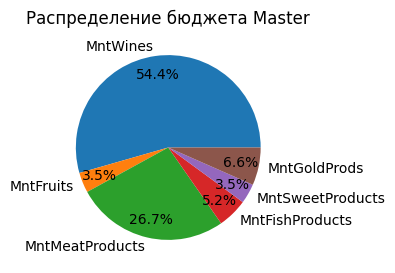

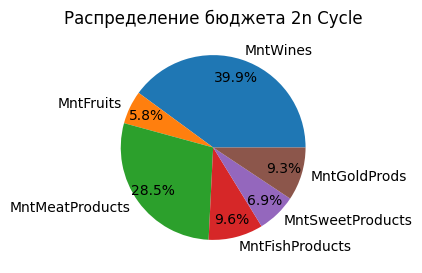

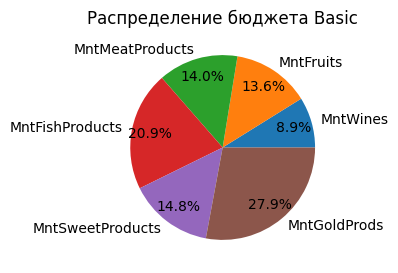

In [487]:
for index, row in df_education.iterrows():
    plt.figure(figsize=(3, 3))
    plt.pie(row[:-1], labels=row[:-1].index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
    plt.title(f'Распределение бюджета {index}')
    plt.show()

Из графиков видно, что с повышением уровня образования траты на все виды продуктов увеличиваются. Причем доля алкоголя в бюджете покупателя также увеличивается.

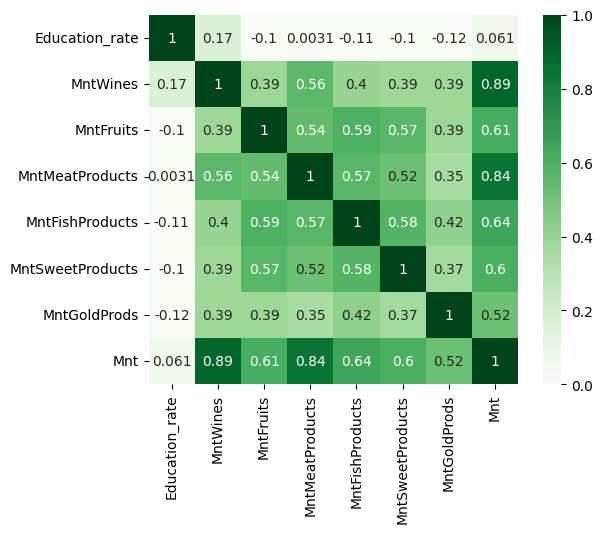

In [488]:
df_phik_age = df.loc[:, ['Education_rate', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']]
corrs = df_phik_age.corr()
# plt.figure(figsize=(12, 10))
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Из корреляционной матрицы можно видеть, что действительно есть незначительная зависимость между образованием и тратами на вино (0.17), а также на золото (-0.12) и рыбу (-0.11). С возрастанием степени образования траты на вино увеличиваются, а на золото и рыбу уменьшаются.

In [489]:
df_status = df.groupby('Marital_Status')\
    [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt']].mean()\
    .sort_values(['Mnt'], ascending=False)
df_status

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt
Marital_Status,,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000,1192.500000
Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234,738.818182
Divorced,326.186147,27.519481,150.822511,35.164502,26.917749,46.380952,612.991342
Single,288.916493,26.891441,182.478079,38.281837,27.319415,43.816284,607.703549
Together,306.565744,25.164360,167.681661,38.932526,26.100346,42.735294,607.179931
Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917,590.802083
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000,424.000000
Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000,256.666667


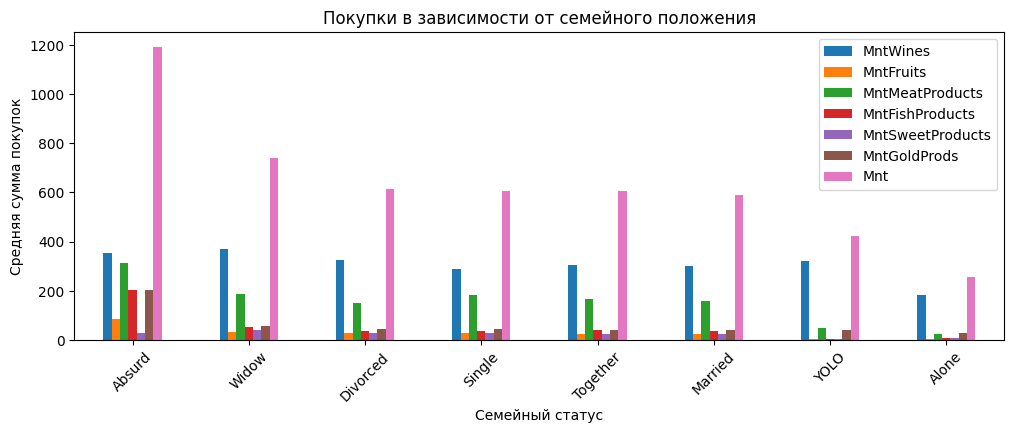

In [490]:
df_status.plot(kind='bar', figsize=(12, 4), rot=45)

plt.title('Покупки в зависимости от семейного положения')
plt.xlabel('Семейный статус')
plt.ylabel('Средняя сумма покупок')
plt.show()

Из таблицы видно, что люди со статусом "Absurd" имеют самые высокие показатели потребления почти всех видов продуктов и услуг, в.т.ч. золота (204 ед.). Вдовцы также имеют высокие показатели потребления, особенно в категориях вина и мясных продуктов. Одинокие имеют самые низкие показатели потребления, в т.ч. золота  (27 ед.). Женатые люди тратят на покупку золота в среднем 42 ед. наравне с "Together" и "YOLO".

In [491]:
married = df[df['Marital_Status'] == 'Married']['MntGoldProds']
single = df[df['Marital_Status'] != 'Married']['MntGoldProds']

t_stat, p_value = stats.ttest_ind(married, single)
print(p_value)

if p_value < 0.05:
    if t_stat < 0:
        print('Женатые люди тратят меньше денег на покупку золота с погрешностью 95%')
    else:
        print('Женатые люди тратят больше денег на покупку золота с погрешностью 95%')
else:
    print('Нет статистически значимой разницы в трате денег на покупку золота между женатыми и неженатыми людьми')

0.4031856795941534
Нет статистически значимой разницы в трате денег на покупку золота между женатыми и неженатыми людьми


**Вывод:**

Таким образом, нельзя с уверенностью сказать, что женатые люди тратят на покупку золота больше или меньше денег по сравнению с неженатыми.

In [492]:
df['NumNotDealsPurchases'] = df['NumPurchases'] - df['NumDealsPurchases']
df['WebPurchases'] = df['NumWebPurchases'].apply(lambda x: 0 if x == 0 else 1)
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


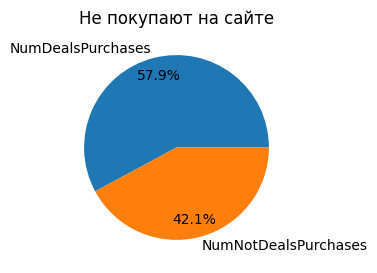

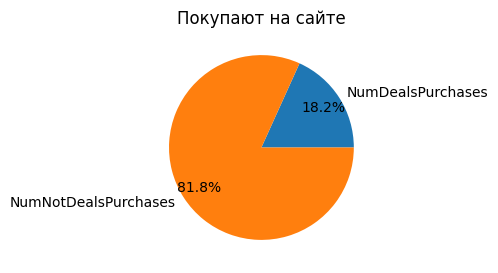

In [493]:
df_deal = df.groupby('WebPurchases')[['NumDealsPurchases', 'NumNotDealsPurchases']].sum()\
    .rename(index={0: 'Не покупают на сайте', 1: 'Покупают на сайте'})

for index, row in df_deal.iterrows():
    plt.figure(figsize=(3, 3))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
    plt.title(index)
    plt.show()

Из круговых диаграмм очевидно, что те, кто не покупает продукты на сайте, чаще берут со скидкой. Но так ли это на самом деле? Рассмотрим связь между покупками со скидкой и покупками на сайте с учетом количества покупок на сайте. Рассчитаем отношение покупок со скидкой к покупкам на сайте. 

In [494]:
df_web = df[df['NumWebPurchases'] != 0]
df_web['NumDealsWebPurchases'] = df_web['NumDealsPurchases'] / df_web['NumWebPurchases']
df_web['NumDealsWebPurchases'].mean()

np.float64(0.741710263520963)

Коэффициет 0,74 показывает, что 74% покупателей на сайте покупают товары со скидкой. Наглядно это можно видеть на графике ниже, где пунктирная линия означает 50%.

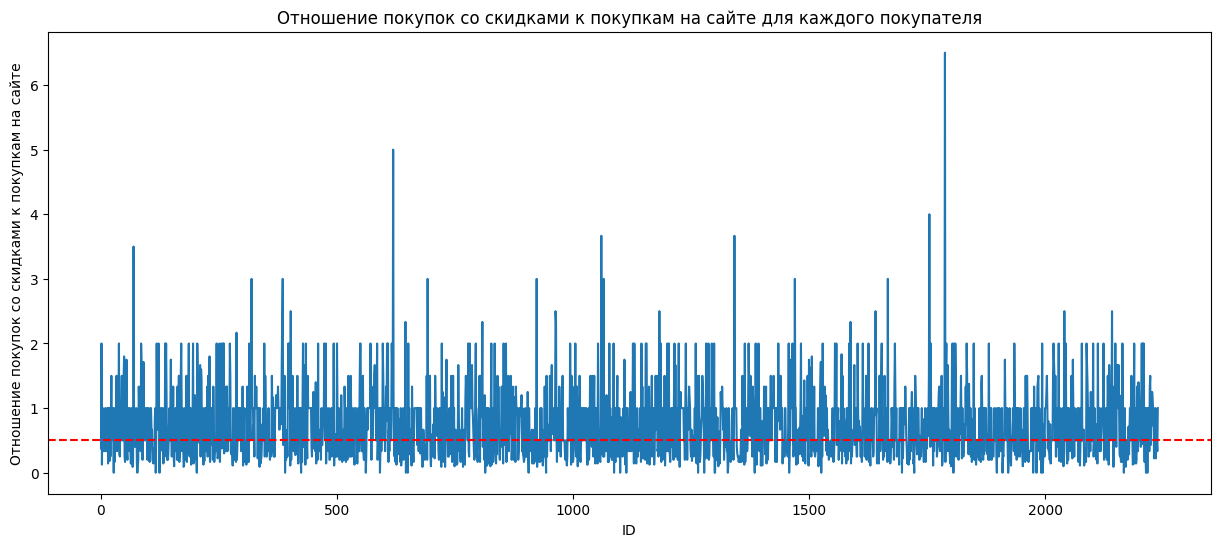

In [495]:
plt.figure(figsize=(15, 6))
plt.plot(df_web.index, df_web.NumDealsWebPurchases)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% line')
plt.xlabel('ID')
plt.ylabel('Отношение покупок со скидками к покупкам на сайте')
plt.title('Отношение покупок со скидками к покупкам на сайте для каждого покупателя')
plt.show()

Проверим гипотезу о том, что средние двух выборок (тех, кто покупает на сайте, и тех, кто не покупает, не различаются):

In [496]:
df_web = df[df.NumWebPurchases != 0]['NumDealsPurchases']
df_no_web = df[df.NumWebPurchases == 0]['NumDealsPurchases']

In [497]:
_, pvalue = stats.ttest_ind(df_web, df_no_web)

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Отвергаем нулевую гипотезу: средние различаются.')
else:
    print(f'P-value:{pvalue:.5f}. Не отвергаем нулевую гипотезу: средние не различаются.')

P-value:0.41016. Не отвергаем нулевую гипотезу: средние не различаются.


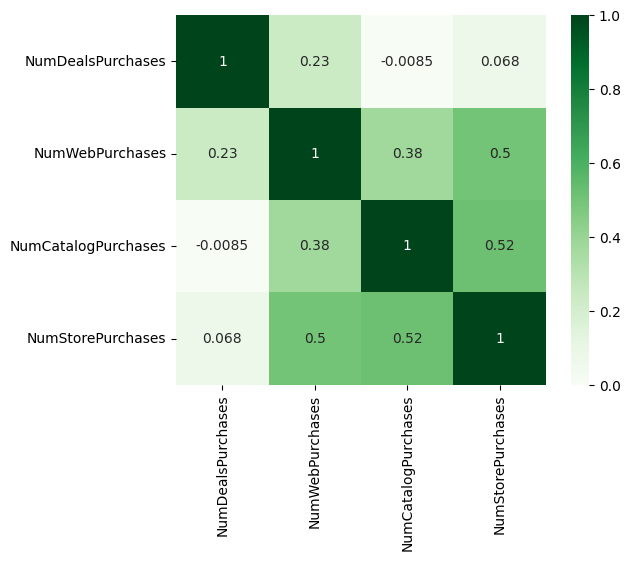

In [498]:
df_phik = df.loc[:, ['NumDealsPurchases', 'NumWebPurchases',\
       'NumCatalogPurchases', 'NumStorePurchases']]
corrs = df_phik.corr()
# plt.figure(figsize=(12, 10))
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Таким образом, можно сделать вывод, что чем чаще клиент покупает товары на сайте, тем чаще он делает это со скидкой. На это указывает коэффициент корреляции 0,23 в матрице. Также можно видеть, что чем чаще человек покупает товары в магазине, тем вероятнее он сделает это и по каталогу (0,52). А чем чаще клиент покупает на сайте, тем вероятнее он сделает покупку и в самом магазине.

In [499]:
df_complain = df[df['Complain'] == 1][['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Mnt']].mean()
df_no_complain = df[df['Complain'] == 0][['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Mnt']].mean()

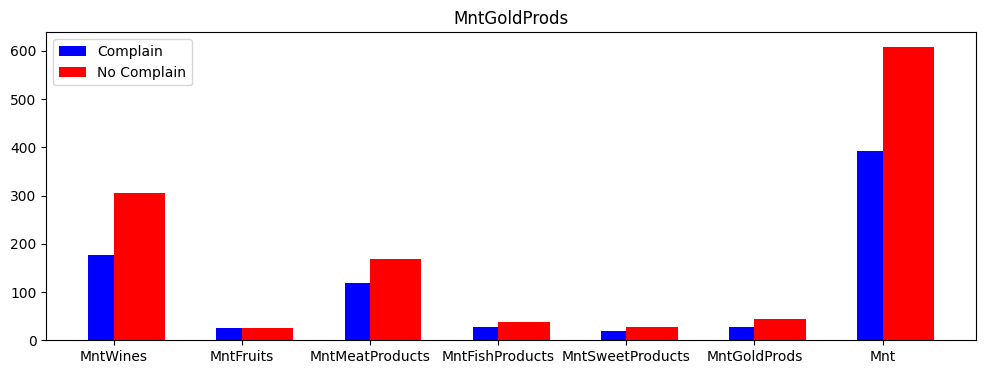

In [500]:
plt.figure(figsize=(12, 4))
plt.bar(df_complain.index, df_complain.values, color='b', width=0.4, label='Complain', align='center')
plt.bar(df_no_complain.index, df_no_complain.values, color='r', width=0.4, label='No Complain', align='edge')
plt.title(col)
plt.legend()
plt.show()

Из графика видно, что покупатели, которые в среднем тратят больше, меньше жалуются. Это можно объяснить большей удовлетворенностью качеством более дорогих продуктов.

In [501]:
_, pvalue = stats.ttest_ind(df_complain, df_no_complain)

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Отвергаем нулевую гипотезу: средние различаются.')
else:
    print(f'P-value:{pvalue:.5f}. Не отвергаем нулевую гипотезу: средние не различаются.')

P-value:0.53804. Не отвергаем нулевую гипотезу: средние не различаются.


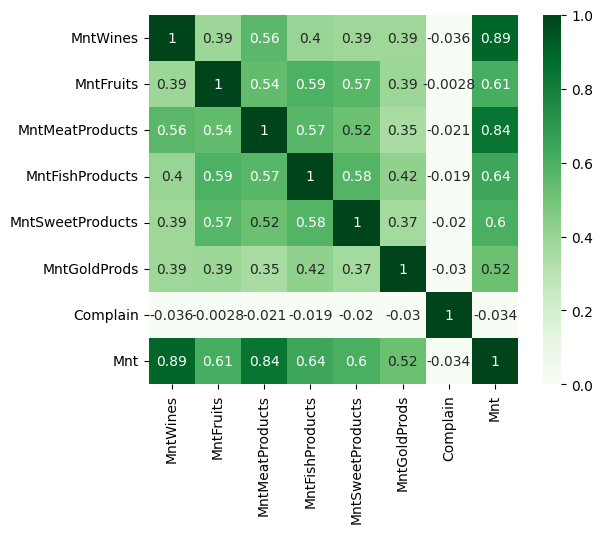

In [502]:
df_phik = df.loc[:, ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Complain', 'Mnt']]
corrs = df_phik.corr()
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Из матрицы видно, что минимальная орицательная корреляция между тратами и жалобами действительно наблюдается (от -0,0028 до -0,036), но не является решающим фактором.

In [503]:
response_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']

df_response = []
for col in response_cols:
    df_response.append(df[df[col] == 1][['MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'Mnt']].mean())

response = pd.DataFrame(df_response, index=range(1,7))
response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt
1,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1482.222222
2,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1307.666667
3,378.656442,28.392638,181.668712,37.595092,27.288344,66.938650,720.539877
4,746.520958,27.724551,248.772455,40.766467,31.227545,48.113772,1143.125749
5,872.388889,56.401235,467.456790,76.265432,65.314815,76.820988,1614.648148
6,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,987.392216


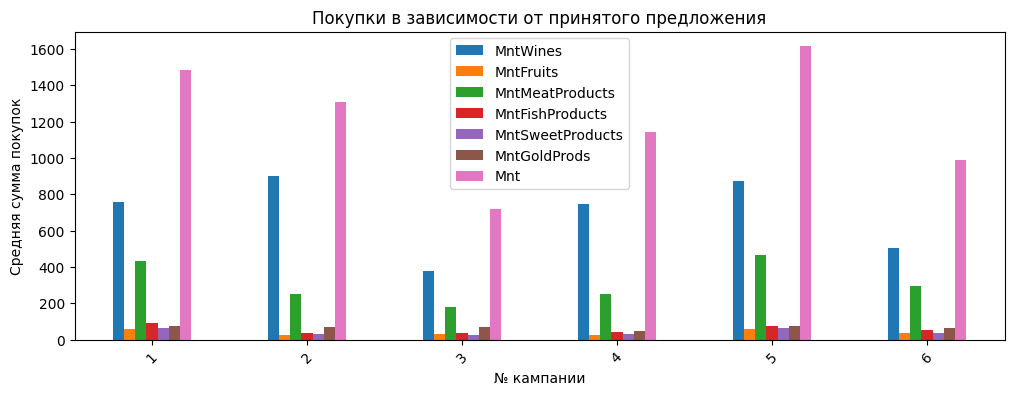

In [504]:
response.plot(kind='bar', figsize=(12, 4), rot=45)

plt.title('Покупки в зависимости от принятого предложения')
plt.xlabel('№ кампании')
plt.ylabel('Средняя сумма покупок')
plt.show()

Из графика видно, что люди, принявшие предложение первой кампании наоборот тратят в среднем больше, чем люди, принявшие предложение последней кампании.

In [505]:
_, pvalue = stats.ttest_ind(df_response[0], df_response[5])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Отвергаем нулевую гипотезу: средние различаются.')
else:
    print(f'P-value:{pvalue:.5f}. Не отвергаем нулевую гипотезу: средние не различаются.')

P-value:0.57248. Не отвергаем нулевую гипотезу: средние не различаются.


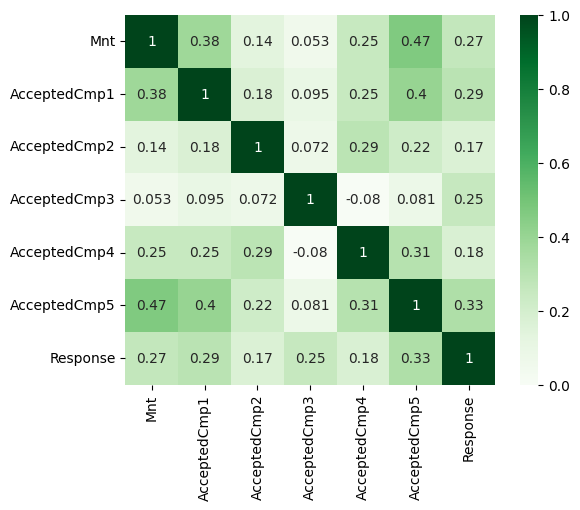

In [506]:
df_phik = df.loc[:, ['Mnt', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']]
corrs = df_phik.corr()
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

**Вывод:**

Из полученных результатов можно видеть, что наибольшие траты совершают люди, принявшие предложения 5 (0,47) и 1 (0,38) кампаний. Меньше всего покупают люди, принявшие предложение 3 кампании (0,053).

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

In [507]:
# ваш код здесь

**Вывод:**

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: